# [ERG-190C] Homework 2: Pandas EPA Air Quality

---

## Table of Contents
[Introduction](#intro)<br>
1 - [Downloading the Data](#data)<br>
2 - [Preparing the Data](#prep)<br>
3 - [Exploring Data with Pandas](#explore)<br>
4 - [California Data](#cadata)<br>

# Introduction <a id='intro'></a>

In this homework, we will investigate air quality data retreived from the EPA. The main goal for this assignment is to understand how PM2.5 FRM/FEM Mass effects air quality. We will accomplish this by analyzing EPA data and utilizing pandas (a powerful Python data analysis toolkit). To give us a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

### Topics Covered

As we clean and explore these data, you will gain practice with:
* Manipulating tables and parts of the table (column, index)
* Identifying the type of data collected, missing values, anomalies, etc.
* Computing numeric operations (mean, variance)
* Merging and analyzing data sets

## Section 1: Downloading the Data<a id='data'></a>

In [1]:
#Run this cell
from pathlib import Path
import sys
import math
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt

To start the assignment, run the cell below to set up some imports that we will need for this assignment:

In many of these assignments (and future adventures as a data scientist) we will use os, zipfile, pandas, numpy, matplotlib.pyplot, and seaborn.  

**Question 1.1:** Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`).  

In [2]:
import numpy as #YOUR CODE HERE
import pandas as #YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-2-3907acf2e36c>, line 1)

In [3]:
#Solution
import numpy as np
import pandas as pd

For this homework, we'll be working with air quality data from the EPA; we want to read the description of the data and download the data from the website.</div>

A description of the data is [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files).  We've already downloaded the data, but you can find it yourself [here](https://aqs.epa.gov/aqsweb/airdata/download_files.html).  To download the data, use a link like this:

https://aqs.epa.gov/aqsweb/airdata/hourly_TYPE_YEAR.zip

...where "TYPE" is the measurement we want and "YEAR" is the year.

**Measurement | (TYPE)**  
Ozone | (44201)  
SO2 | (42401)  
CO | (42101)  
NO2 | (42602)  
PM2.5 FRM/FEM Mass | (88101)  
PM2.5 non FRM/FEM Mass | (88502)  
PM10 Mass | (81102)  
PM2.5 Speciation | (SPEC)  
PM10 Speciation | (PM10SPEC)


We'll focus on PM2.5 Mass (88101) from 2017 in the problem set. Although it's possible to download the dataset exclusively through the notebook environment, the dataset is too large (~4.5 million rows, 1.17GB in size!) to load and process in datahub given the memory constraint. Because of this, we'll be using a reduced version of this dataset which removes readings from certain states that we will not be working with.

<br>
Let's start by using Python to unzip the file and see how this data is laid out:

In [3]:
air_quality_path = Path('data/reduced_PM25_2017.zip')
zf = zipfile.ZipFile(air_quality_path, 'r')
print([f.filename for f in zf.filelist])

['reduced_PM25_2017.csv']


We see that there is only one CSV file within the zip file. From here, we want to then get a sense of the structure of the data within the CSV.

**Question 1.2:** Load the CSV file in the zip.

In [ ]:
f_name = ...
with zf.open(f_name) as f:
    for i in range(2):
        print(f.readline().rstrip().decode())

In [4]:
#Solution
f_name = 'reduced_PM25_2017.csv'
with zf.open(f_name) as f:
    for i in range(2):
        print(f.readline().rstrip().decode())

State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
1,73,23,88101,3,33.553056,-86.815,WGS84,PM2.5 - Local Conditions,2017-01-01,00:00,2017-01-01,06:00,2.3000000000000003,Micrograms/cubic meter (LC),2.0,,,FEM,183,Thermo Scientific 5014i or FH62C14-DHS w/VSCC - Beta Attenuation,Alabama,Jefferson,2017-04-19


<br>
**Question 1.3:** Answer the following boolean expressions using `True` or `False`.

In [ ]:
# Are all the files CSV files?
all_files_appear_to_be_csv = ...

# Do all the files have a header line?
all_files_contain_headers = ...

# Do all the strings in the file have quotes around them?
strings_appear_quoted = ...

In [5]:
#Solution
# Are all the files CSV files?
all_files_appear_to_be_csv = True

# Do all the files have a header line?
all_files_contain_headers = True

# Do all the strings in the file have quotes around them?
strings_appear_quoted = True

#### We can then organize this data and read it better by putting it in a table! We will go over this in the next section.

----

## Section 2: Preparing the Data<a id='prep'></a>

We can see that the file contains a pretty descriptive header, and in fact these are explained in detail in the documentation at the url listed at the top of this notebook. Let's extract it. We are going to pretend there are multiple files in the zip file, and keep using `zf` to read the file and extract the information.  

In [6]:
with zf.open(f_name) as fh:
    PM25_2017 = pd.read_csv(fh, low_memory=False)
PM25_2017.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,1,73,23,88101,3,33.553056,-86.815000,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),2.0,NaN,NaN,FEM,183,Thermo Scientific 5014i or FH62C14-DHS w/VSCC ...,Alabama,Jefferson,2017-04-19
1,2,20,18,88101,3,61.205861,-149.824602,WGS84,PM2.5 - Local Conditions,2017-01-06,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Alaska,Anchorage,2017-05-30
2,4,3,1005,88101,3,31.349200,-109.539683,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,Arizona,Cochise,2017-04-24
3,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22
4,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22


**Question 2.1:** Look through the table and see what data types are within the table. In the following describe at least one potential problem with the above data. Consider issues with missing values and bad data.

Answer: ...

#Solution
NaN, missing data, possible problems with table/data manipulation 

**Question 2.2:** Find the dimensions of the table to figure out how much data we are working with.

*hint: the function `shape` is helpful*

In [ ]:
...

In [7]:
#Solution
PM25_2017.shape

(1198580, 24)

**Question 2.3:** With this information, we can address the question of granularity and answer the questions below.

1. What is the granularity of the `PM25_2017` data frame? 
1. How many records are there?
1. What does each record represent (e.g. a city, an hourly report, etc)?
1. After reading up on the data formats [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files), what does MDL stand for and what is it?

In [ ]:
# use this cell for scratch work
# consider using groupby or value_counts() 
...


Answer: ...

**Question 2.4:** Create an array of all the unique state names in `PM25_2017`.

In [ ]:
unique_states = ...

In [8]:
#Solution
unique_states = pd.unique(PM25_2017['State Name'])
unique_states

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico', 'Country Of Mexico'], dtype=object)

**Question 2.5:** We can see that there are a lot of columns that are unneeded for this data analysis. Let's make a new dataframe with the information we need. Use pd.DataFrame to create a new table with 4 columns:
1. `Date`: The column of dates corresponding to the `Date Local` column.
1. `Time`: The time of day that sampling began on a 24-hour clock corresponding to the `Time Local` column.
1. `Measurement`: The measured value in the standard units of measure for the parameter corresponding to the `Sample Measurement` column.
1. `Units`: The unit of measure for the parameter corresponding to the `Units of Measure` column.
1. `State`: The name of the state where the monitoring site is located.
1. `County`: The name of the county where the monitoring site is located.

In [ ]:
state_table = pd.DataFrame(columns = ["Date", "Time", "Measurement", "Units", "State", "County"])
...

In [9]:
#Solution
state_table = pd.DataFrame(columns = ["Date", "Time", "Measurement", "Units", "State", "County"])
state_table["Date"] = PM25_2017["Date Local"]
state_table["Time"] = PM25_2017["Time Local"]
state_table["Measurement"] = PM25_2017["Sample Measurement"]
state_table["Units"] = PM25_2017["Units of Measure"]
state_table["State"] = PM25_2017["State Name"]
state_table["County"] = PM25_2017["County Name"]

state_table.head()
# state_table.groupby('State').count().head()

,Date,Time,Measurement,Units,State,County
0,2017-01-01,00:00,2.3,Micrograms/cubic meter (LC),Alabama,Jefferson
1,2017-01-06,13:00,3.0,Micrograms/cubic meter (LC),Alaska,Anchorage
2,2017-01-01,00:00,32.0,Micrograms/cubic meter (LC),Arizona,Cochise
3,2017-01-01,00:00,9.0,Micrograms/cubic meter (LC),California,Alameda
4,2017-01-01,01:00,6.0,Micrograms/cubic meter (LC),California,Alameda


----

## Section 3: Exploring Data with Pandas<a id='explore'></a>

According to researchers at the International Journal of Environmental Research and Public Health, PM2.5 is observed with higher concentrations at night and lower concentrations at daytime [(Link to paper)](https://www.ncbi.nlm.nih.gov/pubmed/26426035).

In this section we will analyze our data and see whether this claim proves true.

**Question 3.1:** Using the table from Question 2.5, create a new table containing just data from New York in the Bronx County on 2017-01-01. Set the date as the index. There should be 24 rows in this table.

In [ ]:
ny_concentrations = ...

In [10]:
#Solution
bool = state_table['County'] == 'Bronx'
ny_concentrations = state_table[bool]
ny_concentrations.set_index('Date', inplace=True)
ny_concentrations = ny_concentrations.iloc[0:24]
ny_concentrations

,Time,Measurement,Units,State,County
Date,,,,,
2017-01-01,00:00,6.5,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,01:00,10.9,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,02:00,5.6,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,03:00,3.2,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,04:00,3.4,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,05:00,6.7,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,06:00,5.3,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,07:00,5.2,Micrograms/cubic meter (LC),New York,Bronx
2017-01-01,08:00,6.2,Micrograms/cubic meter (LC),New York,Bronx


<br>
**Question 3.2:** After browsing at the time and the measurement in the table above, what do you notice about the concentration of PM2.5 throughout the day and throughout the night?

Answer: ...

<br>**Question 3.3:** We can also visualize this data and see how the PM2.5 concentrations fluctuate throughout the day. In order to better plot the x-axis, we must add a new column to `ny_concentrations` called `Hours` that correspond with the `Time` column. This is because the `Time` column contains strings and not numbers so we cannot plot them. 

Add the `Hours` column to `ny_concentrations` with a range of 0-24 and then plot `ny_concentrations` with `Hours` as the x-axis and `Measurement` as the y-axis. Don't forget a title and lables on the axes!

In [ ]:
ny_concentrations['Hours'] = np.arange(...)
ny_concentrations.plot(x='Hours', y='Measurement')
plt.title("PM2.5 Concentrations in the Bronx") 
plt.ylabel("PM2.5 Micrograms/cubic meter (LC)")

Text(0,0.5,'PM2.5 Micrograms/cubic meter (LC)')

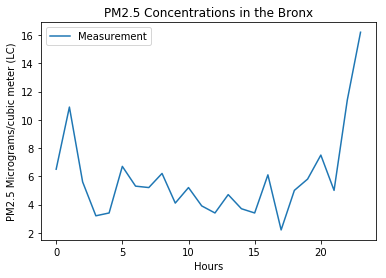

In [11]:
#Solution
ny_concentrations['Hours'] = np.arange(0, 24)
ny_concentrations.plot(x='Hours', y='Measurement')
plt.title("PM2.5 Concentrations in the Bronx") 
plt.ylabel("PM2.5 Micrograms/cubic meter (LC)")

<br>
**Question 3.4:** Describe the trend of the PM2.5 conentrations and why this data supports the statement "PM2.5 is observed with higher concentrations at night and lower concentrations at daytime".

Answer: ...

----

## Section 4: California Data<a id='cadata'></a>

Let's explore data that hits a little closer to home. In this section, we will look at air quality trends in California - more specifically Sonoma County. California is known for its wildfires and last year 5 California cities made it to the [top 10 worst cities for air quality in the United States and Canada](https://www.theguardian.com/cities/datablog/2017/feb/13/most-polluted-cities-world-listed-region). We will use data analysis to see how the fires have impacted PM2.5 cocentrations.

<br>
**Question 4.1:** Create a dataframe called `PM25_2017_CA` that just has PM2.5 2017 California data.

*hint: it might help to use .loc*

In [ ]:
PM25_2017_CA = ...

In [12]:
#Solution
# Method 1
PM25_2017_CA = PM25_2017.loc[PM25_2017['State Name'] == 'California']
PM25_2017_CA.head()

# Method 2
# bool = PM25_2017['State Name'] == 'California'
# PM25_2017_CA = PM25_2017[bool]
# PM25_2017_CA.shape
# PM25_2017_CA.head() 

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,...,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
3,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22
4,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22
5,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22
6,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22
7,6,1,7,88101,3,37.687526,-121.784217,WGS84,PM2.5 - Local Conditions,2017-01-01,...,Micrograms/cubic meter (LC),5.0,NaN,NaN,FEM,170,Met One BAM-1020 Mass Monitor w/VSCC - Beta At...,California,Alameda,2017-03-22


**Question 4.2:** There are still too many uneeded columns, create a table `ca_county_table` with just the columns `Date Local`, `Time Local`, `Sample Measurement`, `County Name`. Try to use the `PM25_2017_CA` table and `.loc`. Use the [EPA website](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_hourly_data_files) to find out what indices belong to each of these columns. 

In [ ]:
ca_county_table = ...

In [13]:
#Solution
ca_county_table = PM25_2017_CA.iloc[:, [9, 10, 13, 22]]
ca_county_table.head()

,Date Local,Time Local,Sample Measurement,County Name
3,2017-01-01,00:00,9.0,Alameda
4,2017-01-01,01:00,6.0,Alameda
5,2017-01-01,02:00,6.0,Alameda
6,2017-01-01,03:00,10.0,Alameda
7,2017-01-01,04:00,7.0,Alameda


**Question 4.3:** Find the mean PM2.5 concentrations in each county. 

*hint: `groupby` is a helpful operation*

In [ ]:
# YOUR CODE HERE

In [14]:
#Solution
ca_county_table.groupby('County Name').mean().head()

,Sample Measurement
County Name,
Alameda,10.365725
Calaveras,13.417953
Colusa,6.887251
Contra Costa,11.481128
Del Norte,6.079766


----

<img src="sonoma_county_fire.jpeg" width=400>

The October Fire Siege that started on October 8 was the [‘worst fire disaster in California’s history’](http://www.berkeleyside.com/2017/10/14/whats-fire-northern-california) according to FEMA, the Federal Emergency Management Agency. The October Fire Siege has included 250 wildfires: “At the peak of the wildfires there were 21 major wildfires that, in total, have burned over 245,000 acres, 11,000 firefighters battled the destructive fires that at one time forced 100,000 to evacuate, destroyed an estimated 6,900 structures". 

UC Berkeley students could smell and see the effects of Sonoma County fires as the smells of burning wood and ashes were in the air. October 14, 2017 was one of the peak days that the fires were burning and we will analyze its effects on PM2.5 concentrations on this day.

**Question 4.4:** Using `ca_county_table`, create a table containing just information Sonoma County on October 14, 2017. 

In [ ]:
sonoma_county_table_oct14 = ...

In [15]:
#Solution
sonoma_county_table = ca_county_table.loc[ca_county_table['County Name'] == 'Sonoma']
sonoma_county_table_oct14 = sonoma_county_table.loc[sonoma_county_table['Date Local'] == '2017-10-14']
sonoma_county_table_oct14.head()

,Date Local,Time Local,Sample Measurement,County Name
524580,2017-10-14,00:00,15.0,Sonoma
524581,2017-10-14,01:00,12.0,Sonoma
524582,2017-10-14,02:00,16.0,Sonoma
524583,2017-10-14,03:00,17.0,Sonoma
524584,2017-10-14,04:00,12.0,Sonoma


**Question 4.5:** Using `ca_county_table`, create a table containing just information Sonoma County on Ocotober 1, 2017.

In [ ]:
sonoma_county_table_oct1 = ...

In [16]:
#Solution
sonoma_county_table_oct1 = sonoma_county_table.loc[sonoma_county_table['Date Local'] == '2017-10-01']
sonoma_county_table_oct1.head()

,Date Local,Time Local,Sample Measurement,County Name
524272,2017-10-01,00:00,17.0,Sonoma
524273,2017-10-01,01:00,2.0,Sonoma
524274,2017-10-01,02:00,6.0,Sonoma
524275,2017-10-01,03:00,7.0,Sonoma
524276,2017-10-01,04:00,3.0,Sonoma


**Question 4.6:** Merge `sonoma_county_table_oct14` and `sonoma_county_table_oct1` on `Time Local` to compare their PM2.5 concentrations side by side.

In [ ]:
sonoma_merge = ....
sonoma_merge.rename(columns={'Sample Measurement_x':'Oct14 PM2.5', 'Sample Measurement_y':'Oct1 PM2.5'})

In [17]:
#Solution
sonoma_merge = pd.merge(sonoma_county_table_oct14[['Time Local', 'Sample Measurement']], 
                        sonoma_county_table_oct1[['Sample Measurement', 'Time Local', 'County Name']], 
                        on='Time Local')
sonoma_merged = sonoma_merge.rename(columns={'Sample Measurement_x':'Oct14 PM2.5', 'Sample Measurement_y':'Oct1 PM2.5'})
sonoma_merged.head()

,Time Local,Oct14 PM2.5,Oct1 PM2.5,County Name
0,00:00,15.0,17.0,Sonoma
1,01:00,12.0,2.0,Sonoma
2,02:00,16.0,6.0,Sonoma
3,03:00,17.0,7.0,Sonoma
4,04:00,12.0,3.0,Sonoma


**Question 4.7:** Calcuate the mean PM2.5 measurements of both days. How do you think the PM2.5 concentrations will compare on these two dates?

In [ ]:
#YOUR CODE HERE

In [18]:
#Solution
print(sonoma_county_table_oct14["Sample Measurement"].mean())
print(sonoma_county_table_oct1["Sample Measurement"].mean())

18.458333333333332
4.833333333333333


Answer: ...

----

## Submission

Congrats, you're done with homework 2!

In order to turn in this assignment, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.

----

## Bibliography

- Yao, Ling, et al. - PM2.5 observations during the day vs at night. https://www.ncbi.nlm.nih.gov/pubmed/26426035
- Guardian News and Media - Air quality rankings in cities. https://www.theguardian.com/cities/datablog/2017/feb/13/most-polluted-cities-world-listed-region
- Berkeleyside - Sonoma County fire facts. http://www.berkeleyside.com/2017/10/14/whats-fire-northern-california

---
Notebook developed by: Melissa Ly

Data Science Modules: http://data.berkeley.edu/education/modules